# GOT Episodes IMDb Rating Prediction

### Importing all the required libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
df=pd.read_csv("../DataSets/game of thrones.csv")
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,1-May-11,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,8-May-11,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No. overall             73 non-null     int64  
 1   No. in season           73 non-null     int64  
 2   Season                  73 non-null     int64  
 3   Title                   73 non-null     object 
 4   Directed by             73 non-null     object 
 5   Written by              73 non-null     object 
 6   Novel(s) adapted        73 non-null     object 
 7   Original air date       61 non-null     object 
 8   U.S. viewers(millions)  70 non-null     float64
 9   Imdb rating             73 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.8+ KB


In [4]:
df.shape

(73, 10)

### Data Cleaning

In [5]:
df.isnull().sum()

No. overall                0
No. in season              0
Season                     0
Title                      0
Directed by                0
Written by                 0
Novel(s) adapted           0
Original air date         12
U.S. viewers(millions)     3
Imdb rating                0
dtype: int64

In [6]:
# fill the column 'U.S. viewers(millions)' with mean values 
df['U.S. viewers(millions)'].fillna(value= df['U.S. viewers(millions)'].mean(), inplace=True) 

In [7]:
df.at[6, 'Original air date']

nan

In [8]:
#  Please look into the original df and try to guss a date based on the row index

column = 'Original air date'
#Filling Values in Original air date column---
df.at[6,  column ] ='29-May-11'
df.at[11, column ] ='8-April-12'
df.at[12, column ] ='15-April-12'
df.at[16, column ] ='13-May-12'
df.at[26, column ] ='12-May-13'
df.at[36, column ] ='18-May-14'
df.at[46, column ] ='24-May-15'
df.at[47, column ] ='31-May-15'
df.at[54, column ] ='22-May-16'
df.at[60, column ] ='16-July-17'
df.at[67, column ] ='14-April-19'
df.at[68, column ] ='21-April-19'

In [9]:
# Re-inspect for missing values
df.isnull().sum()

No. overall               0
No. in season             0
Season                    0
Title                     0
Directed by               0
Written by                0
Novel(s) adapted          0
Original air date         0
U.S. viewers(millions)    0
Imdb rating               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No. overall             73 non-null     int64  
 1   No. in season           73 non-null     int64  
 2   Season                  73 non-null     int64  
 3   Title                   73 non-null     object 
 4   Directed by             73 non-null     object 
 5   Written by              73 non-null     object 
 6   Novel(s) adapted        73 non-null     object 
 7   Original air date       73 non-null     object 
 8   U.S. viewers(millions)  73 non-null     float64
 9   Imdb rating             73 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.8+ KB


In [11]:
#Converting dtype object to datetime64[ns] dtype---
df['Original air date']=pd.to_datetime(df['Original air date'])
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1


*********************
## Data Visualization using Graphs
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('fivethirtyeight')

**1. IMdB Rating less than or equals to 8**

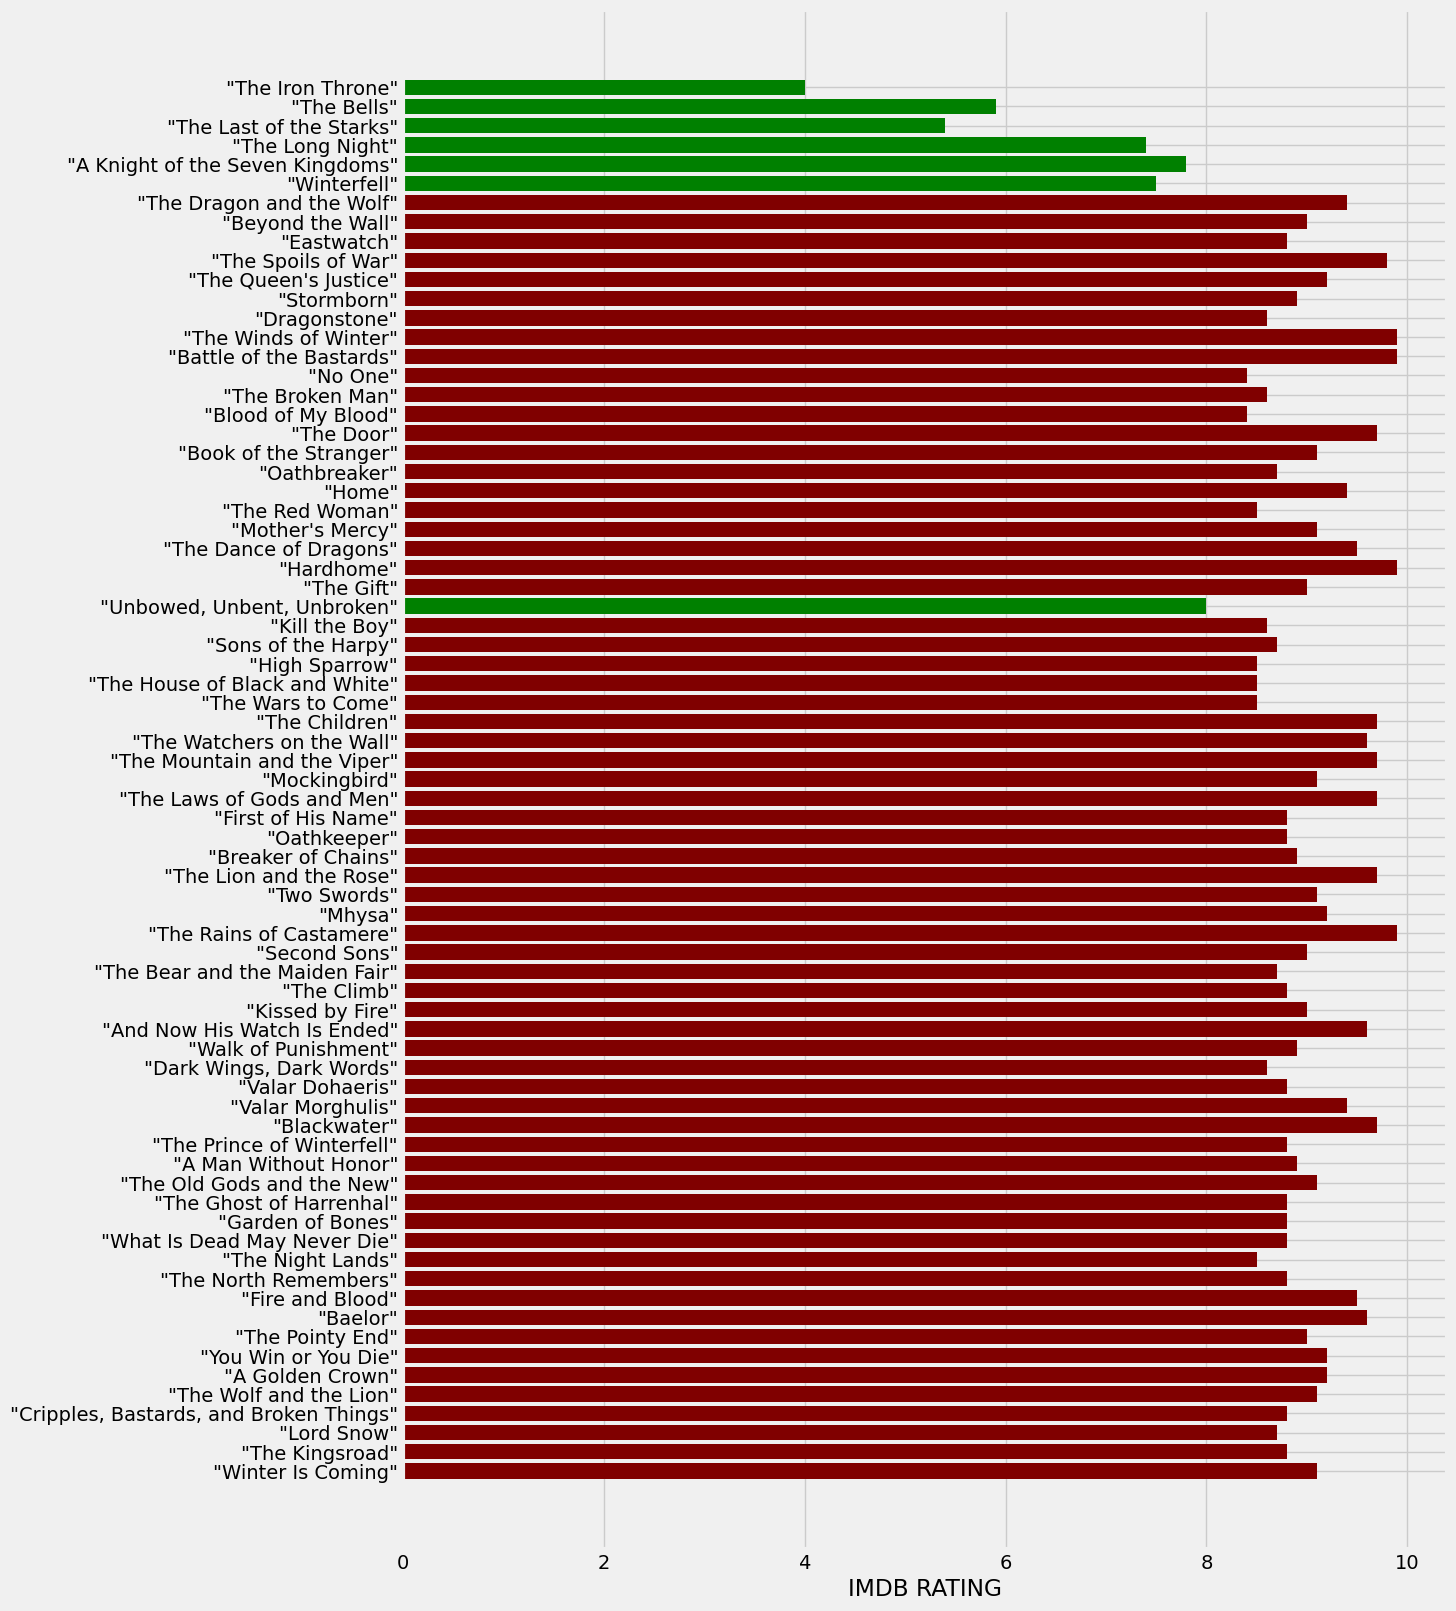

In [13]:
#Imdb rating <=8
plt.gcf().set_size_inches(12,19)
plt.barh(df['Title'],df['Imdb rating'],color=(df['Imdb rating']<=8).map({True:'green',False:'maroon'}))
plt.xlabel('IMDB RATING')
plt.show()

**2. Unique Directors**

In [14]:
df['Directed by'].unique()

array(['Tim Van Patten', 'Brian Kirk', 'Daniel Minahan', 'Alan Taylor',
       'Alik Sakharov', 'David Petrarca', 'David Nutter', 'Neil Marshall',
       'David Benioff', 'Alex Graves', 'Michelle MacLaren', 'D. B. Weiss',
       'Michael Slovis', 'Mark Mylod', 'Jeremy Podeswa',
       'Miguel Sapochnik', 'Daniel Sackheim', 'Jack Bender',
       'Matt Shakman', 'David Benioff & D. B. Weiss'], dtype=object)

**3. The director who directed the most**

In [15]:
#Who directed the most.......
df['Directed by'].max()

'Tim Van Patten'

**4. Unique writters**

In [16]:
df['Written by'].unique()

array(['David Benioff & D. B. Weiss', 'Bryan Cogman',
       'George R. R. Martin', 'Vanessa Taylor', 'Dave Hill'], dtype=object)

**5. Writters who wrote the most**

In [17]:
#Who wrote the most.......
df['Written by'].max()

'Vanessa Taylor'

**6. Unique sources**

In [18]:
df['Novel(s) adapted'].unique()

array(['A Game of Thrones', 'A Clash of Kings', 'A Storm of Swords',
       'A Feast for Crows, A Dance with Dragons and original content',
       'Outline from The Winds of Winter and original content ',
       'Outline from A Dream of Spring and original content '],
      dtype=object)

**7. The famous novel among the writters**

In [19]:
df['Novel(s) adapted'].max()

'Outline from The Winds of Winter and original content '

In [20]:
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1


**8. Plotting the graph based on the views achieved by the show**

<BarContainer object of 73 artists>

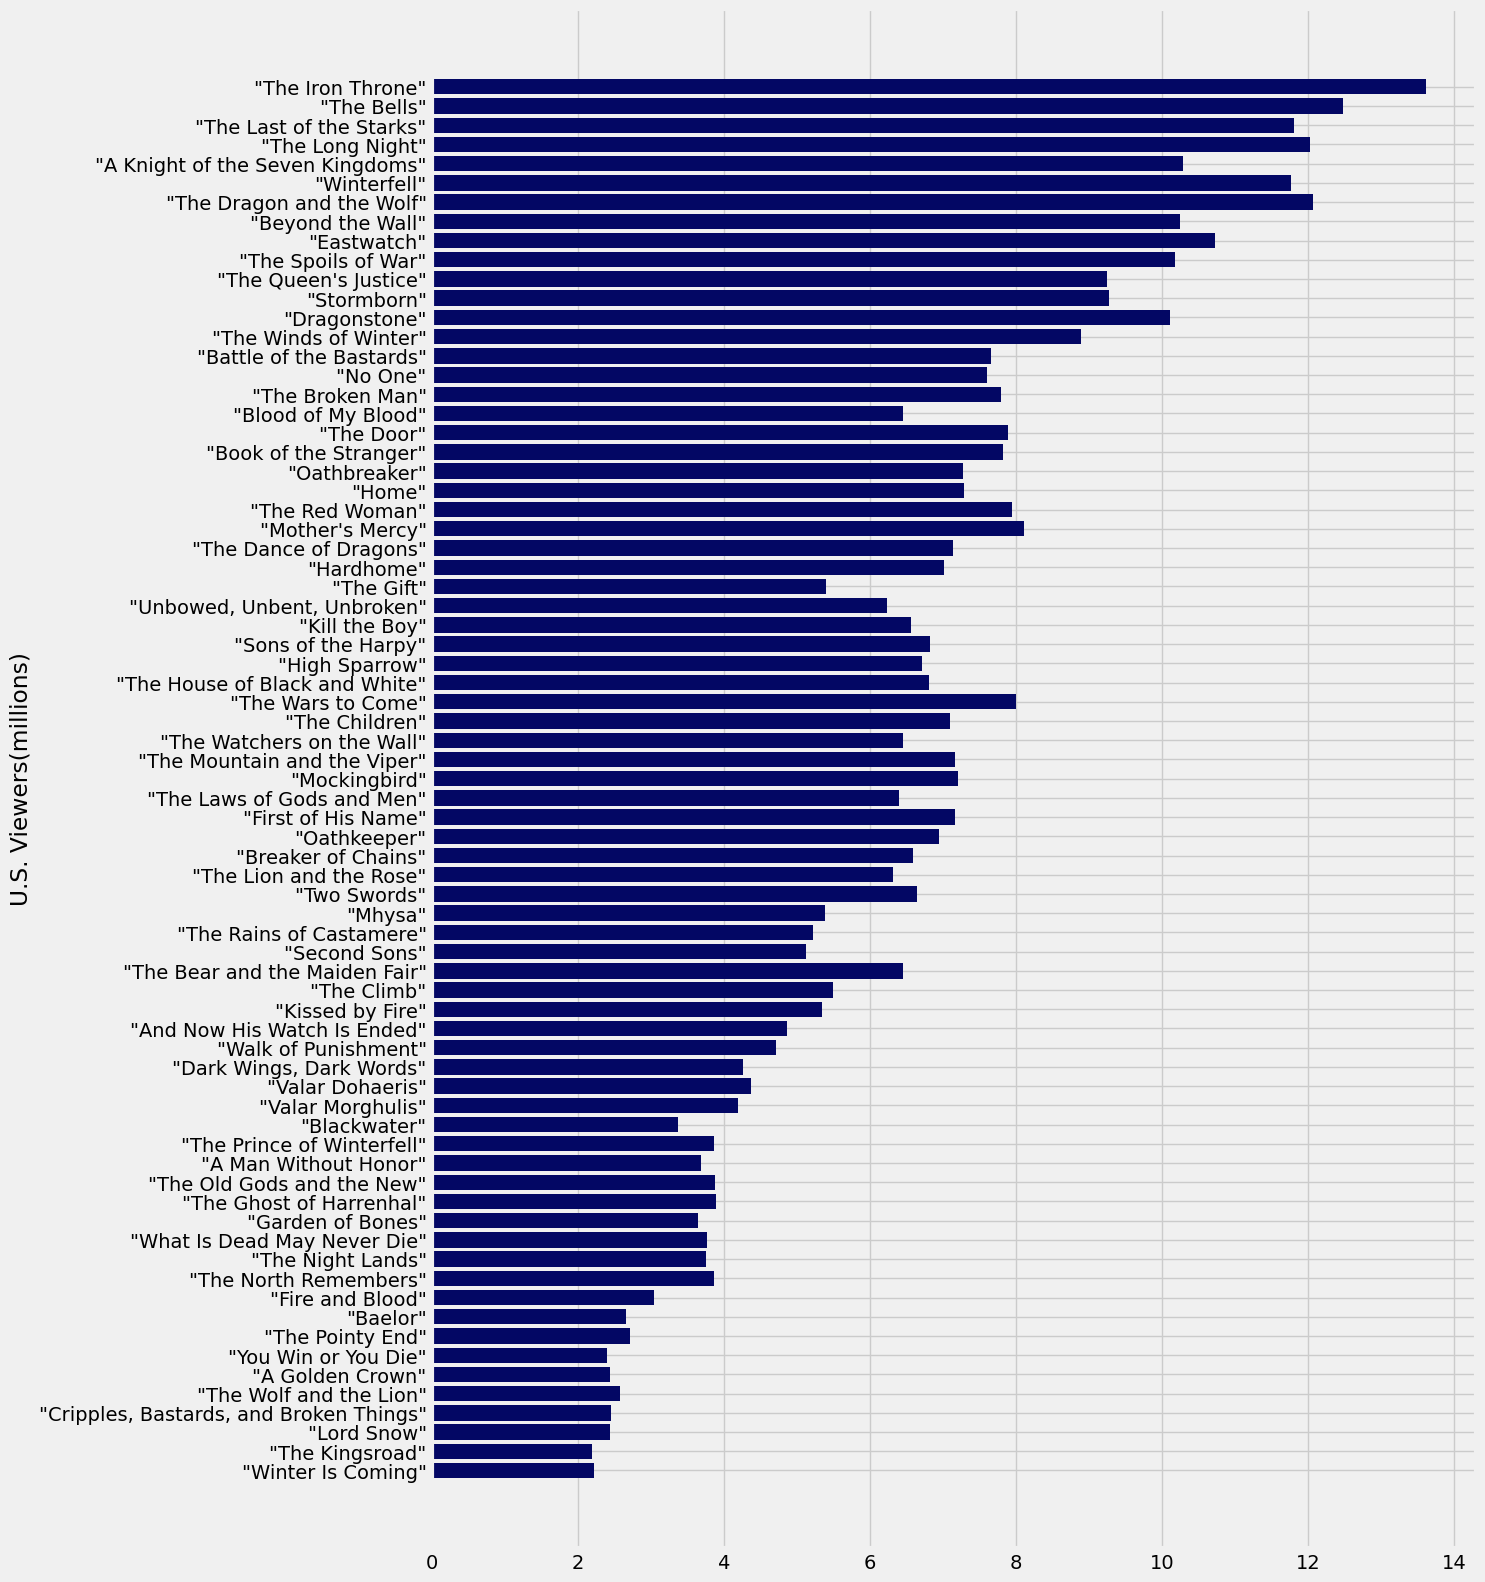

In [21]:
plt.gcf().set_size_inches(12,19)
plt.ylabel("U.S. Viewers(millions)")
plt.barh(df['Title'],df['U.S. viewers(millions)'].values,color='#030764')

**From this graph and from the previous graph we observe that the title which has max viewers has the min IMDB rating....**

*****************************
##   Prediction Model Creation

**Finding out the correlation among the attributes**

In [22]:
df.corr()

,No. overall,No. in season,Season,U.S. viewers(millions),Imdb rating
No. overall,1.000000,-0.033637,0.990319,0.951028,-0.360508
No. in season,-0.033637,1.000000,-0.168137,-0.107802,0.289966
Season,0.990319,-0.168137,1.000000,0.956833,-0.416212
U.S. viewers(millions),0.951028,-0.107802,0.956833,1.000000,-0.475253
Imdb rating,-0.360508,0.289966,-0.416212,-0.475253,1.000000


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


x = df[['U.S. viewers(millions)','Season']]
y = df['Imdb rating']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (54, 2)
X_test: (19, 2)
y_train: (54,)
y_test: (19,)


### Simple Linear Regression

In [24]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = regr.predict(X_test)

In [26]:
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

R2-Score: 0.2160548873152751


In [27]:
regr.score(X_test, y_test)

0.2160548873152751

### Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
y_pred = dtr.predict(X_test)
y_pred

array([9.7, 9.7, 9.6, 8.5, 9. , 9.6, 7.5, 9.7, 9.7, 9.6, 8.5, 8.6, 9.7,
       9.8, 9.9, 9.8, 9. , 7.4, 9.7])

In [30]:
dtr.score(X_test,y_test)

0.1051619275354786

### Random Forest Regression 
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
y_pred = rfr.predict(X_test)
y_pred

array([9.68 , 9.649, 9.228, 8.74 , 9.042, 9.365, 7.479, 9.649, 9.544,
       9.435, 8.676, 8.892, 9.668, 9.472, 9.647, 9.412, 9.072, 7.314,
       9.649])

In [33]:
rfr.score(X_test,y_test)

0.2740374772573678

### Lasso Regression

In [34]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [35]:
y_pred = lasso.predict(X_test)
y_pred

array([8.7456723 , 8.77528859, 9.09187647, 8.87741371, 9.04081391,
       8.91419335, 8.36883059, 8.76303357, 8.84269117, 9.29612672,
       8.88864748, 8.91419335, 8.75690607, 8.54142205, 8.86413745,
       8.52814579, 9.05000517, 8.29938551, 8.77733109])

In [36]:
lasso.score(X_test,y_test)

0.18226792631029864

### Ridge Regression

In [37]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [38]:
y_pred = ridge.predict(X_test)
y_pred

array([8.61841527, 8.94014571, 9.13169009, 8.99428153, 8.98600549,
       8.62474931, 8.25496306, 8.90518141, 8.65798263, 9.23996173,
       9.02633214, 9.33644944, 8.65046588, 8.51014363, 8.71917016,
       8.47226563, 9.01222872, 8.05683201, 8.94597309])

In [39]:
ridge.score(X_test,y_test)

0.21612629727916832

### XgBoost Regressor 

In [40]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
y_pred = xgb.predict(X_test)
y_pred

array([9.701736 , 9.701736 , 9.5964985, 8.501282 , 9.003157 , 9.600048 ,
       7.4984713, 9.701736 , 9.698311 , 9.597966 , 8.604312 , 9.045773 ,
       9.701736 , 9.797796 , 9.877027 , 9.396771 , 9.003157 , 7.6730795,
       9.701736 ], dtype=float32)

In [42]:
xgb.score(X_test,y_test)

0.06875048609481293

### MLP Regressor 

In [43]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [44]:
y_pred = mlp.predict(X_test)
y_pred

array([ 9.31643272,  9.68925051,  6.16563354,  8.53529693,  6.46719693,
        7.19258462, 13.20319193,  9.76335799,  8.18254128,  3.86230408,
        8.46736508,  8.85217653,  9.25041661, 11.63153814,  8.06048417,
       11.70955719,  6.41318374, 13.61129154,  9.67689927])

In [45]:
mlp.score(X_test,y_test)

-8.69804195021981

### Gradient Boosting Regressor 

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [47]:
y_pred = gb.predict(X_test)
y_pred

array([9.83953559, 9.74783701, 9.41463129, 8.50550409, 9.14862837,
       9.4032644 , 7.47943739, 9.74783701, 9.59315783, 9.51412474,
       8.50550409, 8.86437565, 9.83953559, 9.59076609, 9.64174216,
       9.10002746, 9.14862837, 7.83732662, 9.74783701])

In [48]:
gb.score(X_test,y_test)

0.11572819863749884

### Support Vector Machine Regressor 

In [49]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [50]:
y_pred =svm.predict(X_test)
y_pred

array([9.76215595, 9.45359243, 8.92610186, 9.38901008, 9.04032823,
       9.37417874, 7.68721969, 9.4786258 , 9.59741005, 9.00076964,
       9.35029643, 9.06473377, 9.73928511, 8.89279714, 9.53240579,
       8.84909105, 9.01837081, 7.46894091, 9.44919936])

In [51]:
svm.score(X_test,y_test)

0.23029753990568047


### Conclusion

We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.



